# Trueskill

How does trueskill converge over the finals?

In [1]:
from viz import load_all_games
from viz import score_with_default_trueskill 
from viz import plot_players 
import trueskill

import datetime
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline  

In [2]:
games = load_all_games() # Takes a minute

In [7]:
trueskill.setup(tau=0.08333333333333334)
players = score_with_default_trueskill(games) # Takes a few minutes

Loading Games
5000 of 74080
10000 of 74080
15000 of 74080
20000 of 74080
25000 of 74080
30000 of 74080
35000 of 74080
40000 of 74080
45000 of 74080
50000 of 74080
55000 of 74080
60000 of 74080
65000 of 74080
70000 of 74080
Done


In [38]:
trueskill.setup(tau=0.02)
triple_games = games + games + games
players_triple_games_low_tau = score_with_default_trueskill(triple_games) # Takes a long time

Loading Games
5000 of 222240
10000 of 222240
15000 of 222240
20000 of 222240
25000 of 222240
30000 of 222240
35000 of 222240
40000 of 222240
45000 of 222240
50000 of 222240
55000 of 222240
60000 of 222240
65000 of 222240
70000 of 222240
75000 of 222240
80000 of 222240
85000 of 222240
90000 of 222240
95000 of 222240
100000 of 222240
105000 of 222240
110000 of 222240
115000 of 222240
120000 of 222240
125000 of 222240
130000 of 222240
135000 of 222240
140000 of 222240
145000 of 222240
150000 of 222240
155000 of 222240
160000 of 222240
165000 of 222240
170000 of 222240
175000 of 222240
180000 of 222240
185000 of 222240
190000 of 222240
195000 of 222240
200000 of 222240
205000 of 222240
210000 of 222240
215000 of 222240
220000 of 222240
Done


In [40]:
trueskill.setup(tau=0.02)
players_low_tau = score_with_default_trueskill(games) # Takes a few minutes

Loading Games
5000 of 74080
10000 of 74080
15000 of 74080
20000 of 74080
25000 of 74080
30000 of 74080
35000 of 74080
40000 of 74080
45000 of 74080
50000 of 74080
55000 of 74080
60000 of 74080
65000 of 74080
70000 of 74080
Done


In [3]:
trueskill.setup(tau=0.08333333333333334)
players_topbottom = score_with_default_trueskill(games, style="topbottom-trueskill") # Takes a few minutes

Loading Games
5000 of 74080
10000 of 74080
15000 of 74080
20000 of 74080
25000 of 74080
30000 of 74080
35000 of 74080
40000 of 74080
45000 of 74080
50000 of 74080
55000 of 74080
60000 of 74080
65000 of 74080
70000 of 74080
Done


In [43]:
players["mzotkiew"].rating_data[-1]

PlayerData(timestamp=u'2017-02-16 04:51:19', game_number=311, mu=54.088555334996265, sigma=0.7347539882923072)

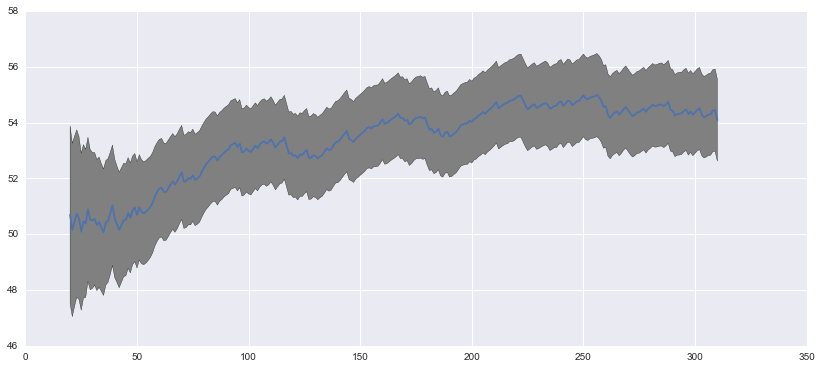

In [9]:
def plot_converge(player):
    player_mus = []
    player_sigmas = []
    player_dates = []
    for r_data in player.rating_data[20:]:
        player_mus.append(r_data.mu)
        player_sigmas.append(r_data.sigma)
        player_dates.append(datetime.datetime.strptime(r_data.timestamp,'%Y-%m-%d %H:%M:%S'))

    player_mus = np.array(player_mus)
    player_sigmas = np.array(player_sigmas)
    dates = matplotlib.dates.date2num(player_dates)

    sns.set_style("darkgrid")
    plt.rcParams["figure.figsize"] = [14.0, 6.0]
    plt.fill_between(range(20, len(player.rating_data)), player_mus+player_sigmas*2, player_mus-player_sigmas*2, facecolor='grey')
    plt.plot(range(20, len(player.rating_data)), player_mus)
    plt.show()
    
#     plt.fill_between(range(20, len(player.rating_data)), player_sigmas, facecolor='grey')
#     plt.ylim((0,1))
#     plt.show()
    
    
plot_converge(players["mzotkiew"])

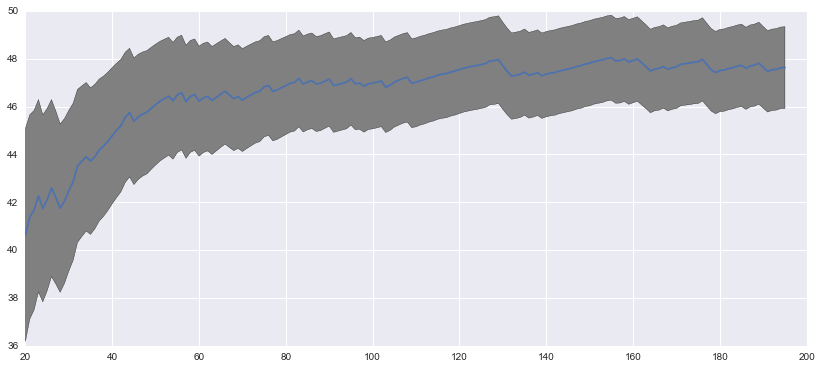

In [10]:
plot_converge(players_topbottom["mzotkiew"])

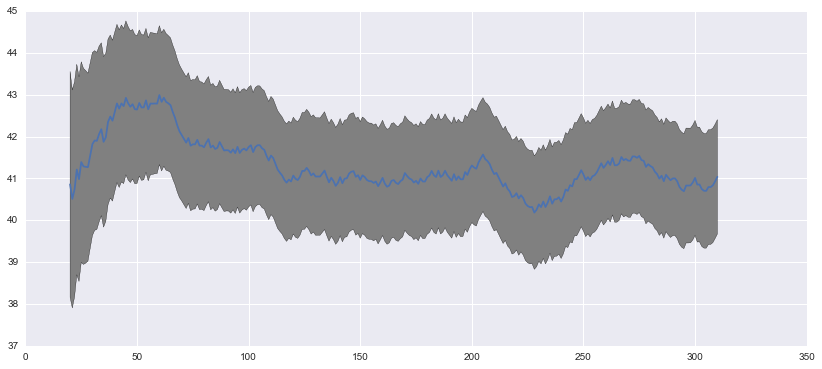

In [11]:
plot_converge(players["DanielVF"])

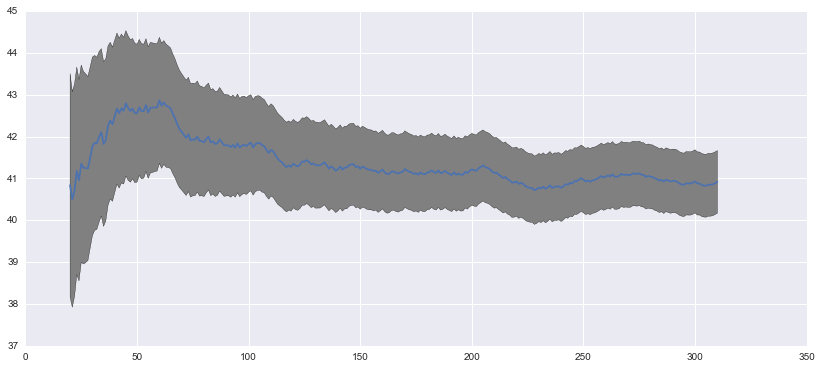

In [42]:
plot_converge(players_low_tau["DanielVF"])

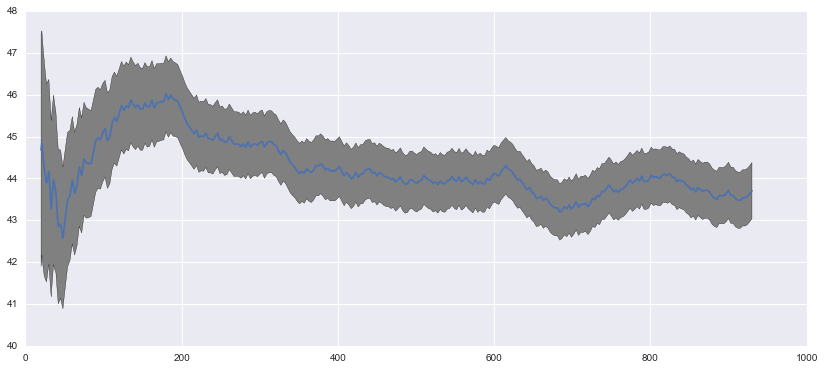

In [39]:
plot_converge(players_triple_games_low_tau["DanielVF"])

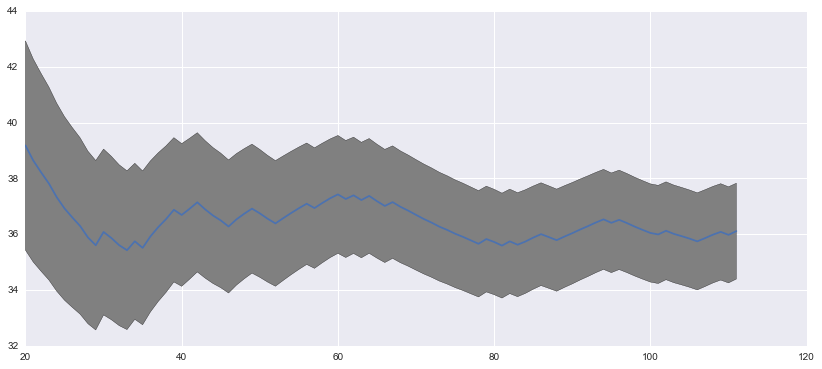

In [6]:
plot_converge(players_topbottom["DanielVF"])

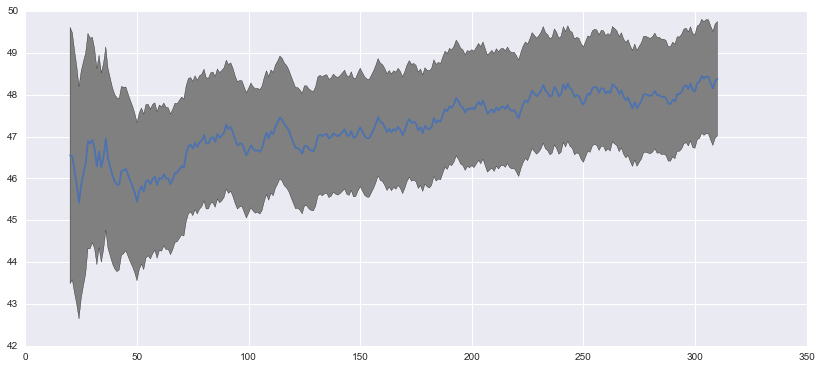

In [12]:
plot_converge(players["nmalaguti"])

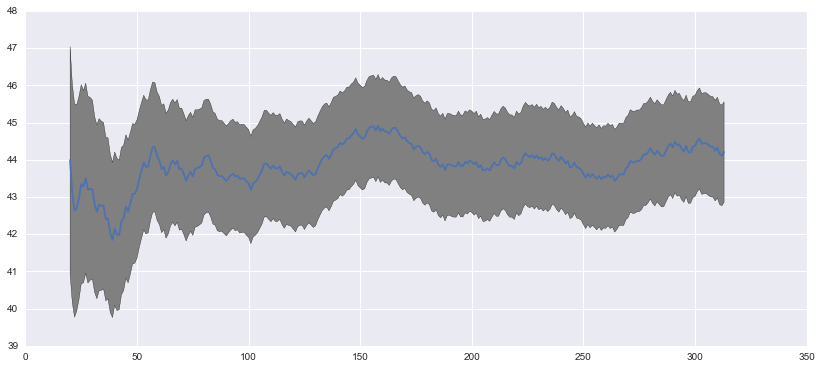

In [13]:
plot_converge(players["tmseiler"])

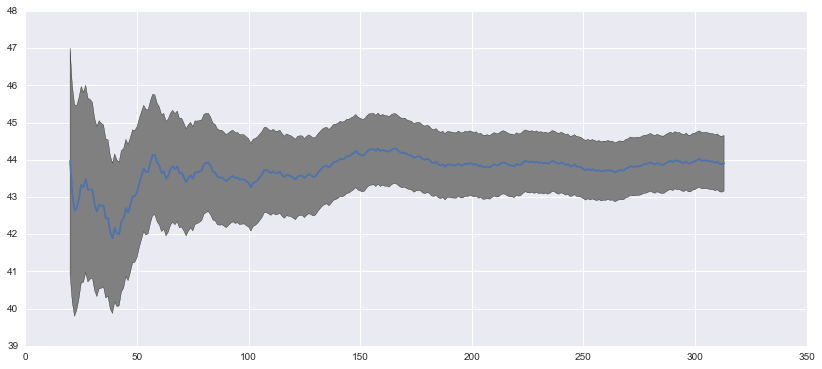

In [34]:
plot_converge(players_low_tau["tmseiler"])

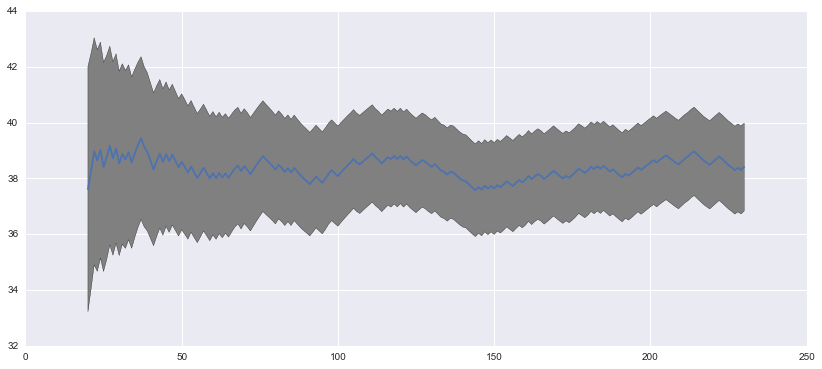

In [15]:
plot_converge(players_topbottom["tmseiler"])

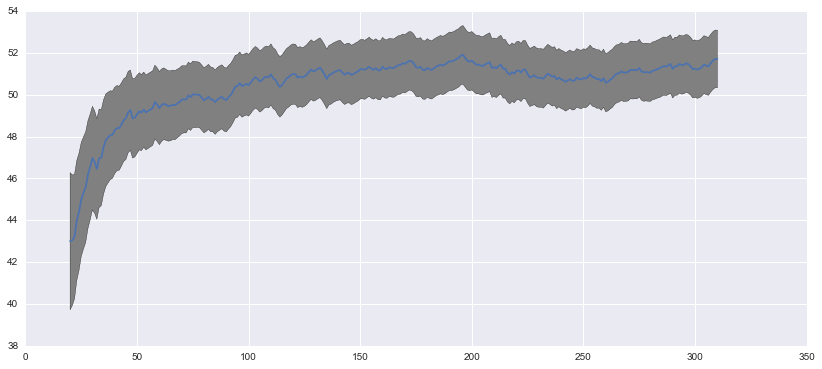

In [37]:
plot_converge(players["shummie"])

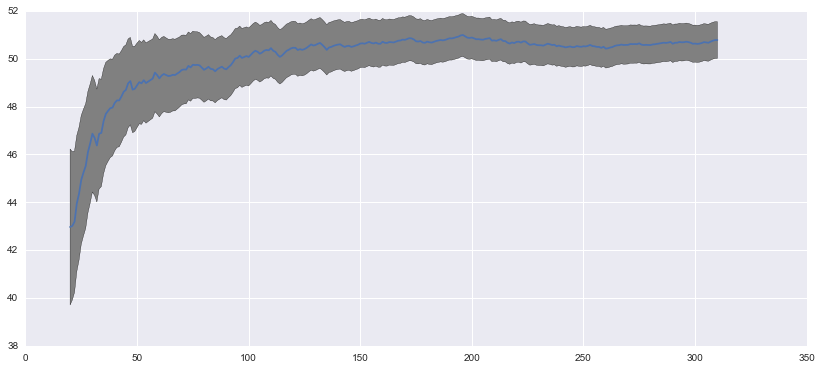

In [36]:
plot_converge(players_low_tau["shummie"])

In [31]:
def leaderboard(players):
    ranked_players = []
    
    for username, player in players.iteritems():
        ranked_players.append([username, player.rating_data[-1].mu, player.rating_data[-1].sigma])
       
    ranked_players.sort(key=lambda x: 0-x[1])
    
    return ranked_players[0: 10]

leaderboard(players)

[[u'mzotkiew', 54.088555334996265, 0.7347539882923072],
 [u'shummie', 51.70943707157404, 0.6879264258457736],
 [u'erdman', 50.59844104618116, 0.6893549790684195],
 [u'timfoden', 50.002542756311435, 0.687535053414995],
 [u'cdurbin', 49.36468914759962, 0.6721491302399388],
 [u'nmalaguti', 48.38107858702743, 0.6834538091401504],
 [u'DexGroves', 46.78841915110942, 0.6943444433836159],
 [u'PeppiKokki', 46.72905956979144, 0.6906517647256343],
 [u'ewirkerman', 46.30073369778646, 0.6857179087833113],
 [u'moonbirth', 45.443875362920416, 0.6959254869550967]]

In [35]:
leaderboard(players_low_tau)

[[u'mzotkiew', 53.54433330240484, 0.4129158276713599],
 [u'shummie', 50.78629396839664, 0.3835662086279772],
 [u'erdman', 50.61946214091721, 0.38817075486703656],
 [u'timfoden', 49.53971877257921, 0.3825442956065577],
 [u'cdurbin', 48.13506247807434, 0.375484463135786],
 [u'nmalaguti', 47.45685560301771, 0.3815885605498769],
 [u'PeppiKokki', 46.68061882851462, 0.38163375512128783],
 [u'DexGroves', 46.382652898332, 0.3830138510914419],
 [u'ewirkerman', 45.82117599972104, 0.3787143488905889],
 [u'moonbirth', 44.96361459267737, 0.37997992143010445]]

In [41]:
leaderboard(players_triple_games_low_tau)

[[u'mzotkiew', 57.453205078592504, 0.36125486007586305],
 [u'shummie', 54.8507588337117, 0.33854707565723136],
 [u'erdman', 54.12136184395233, 0.3397190207103455],
 [u'timfoden', 53.327566187097176, 0.3382740445558436],
 [u'cdurbin', 52.493301168655, 0.3318503871922897],
 [u'nmalaguti', 51.566709062653885, 0.3362194480018917],
 [u'PeppiKokki', 50.157824413035556, 0.33946415567091337],
 [u'DexGroves', 50.08254792614321, 0.3405164455020641],
 [u'ewirkerman', 49.520998632480875, 0.336469547615576],
 [u'moonbirth', 48.63220822332749, 0.3408044223895598]]

In [32]:
leaderboard(players_topbottom)

[[u'mzotkiew', 47.63434586769785, 0.8547068385506987],
 [u'erdman', 46.716333058773216, 0.8836152265469033],
 [u'shummie', 45.515833166839, 0.8882671387894178],
 [u'timfoden', 43.75574628824547, 0.8010440803516786],
 [u'nmalaguti', 41.678373269716886, 0.8592421665218546],
 [u'cdurbin', 41.010752420776015, 0.8383025767380018],
 [u'acouette', 40.89615051087471, 0.8353534556845077],
 [u'PeppiKokki', 40.51460973402188, 0.7985936653532623],
 [u'ewirkerman', 40.25563615576646, 0.7936826476140858],
 [u'DexGroves', 40.145185461414584, 0.8617162469135051]]

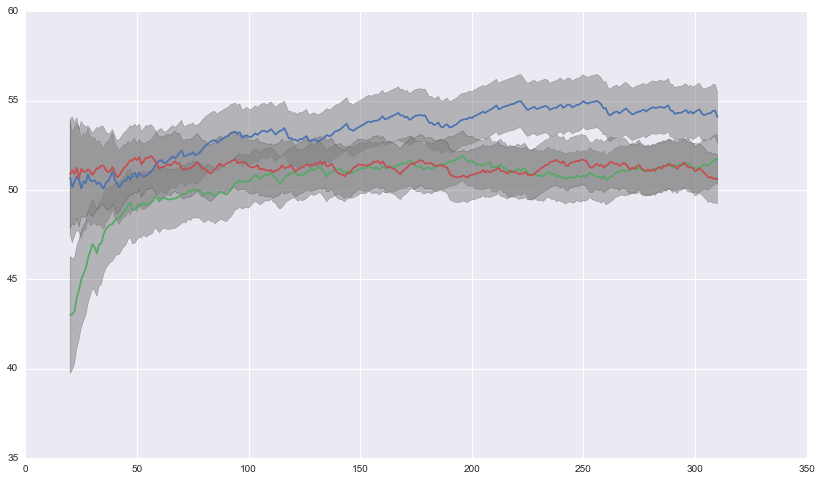

In [52]:
def plot_compare(players, player_names):
    for name in player_names:
        player = players[name]
        player_mus = []
        player_sigmas = []
        player_dates = []
        for r_data in player.rating_data[20:]:
            player_mus.append(r_data.mu)
            player_sigmas.append(r_data.sigma)
            player_dates.append(datetime.datetime.strptime(r_data.timestamp,'%Y-%m-%d %H:%M:%S'))

        player_mus = np.array(player_mus)
        player_sigmas = np.array(player_sigmas)
        dates = matplotlib.dates.date2num(player_dates)

        sns.set_style("darkgrid")
        plt.rcParams["figure.figsize"] = [14.0, 8.0]
        plt.fill_between(range(20, len(player.rating_data)), player_mus+player_sigmas*2, player_mus-player_sigmas*2, facecolor='grey', alpha=0.5,)
        plt.plot(range(20, len(player.rating_data)), player_mus)
    plt.show()
    
    
plot_compare(players,["mzotkiew","shummie","erdman"])

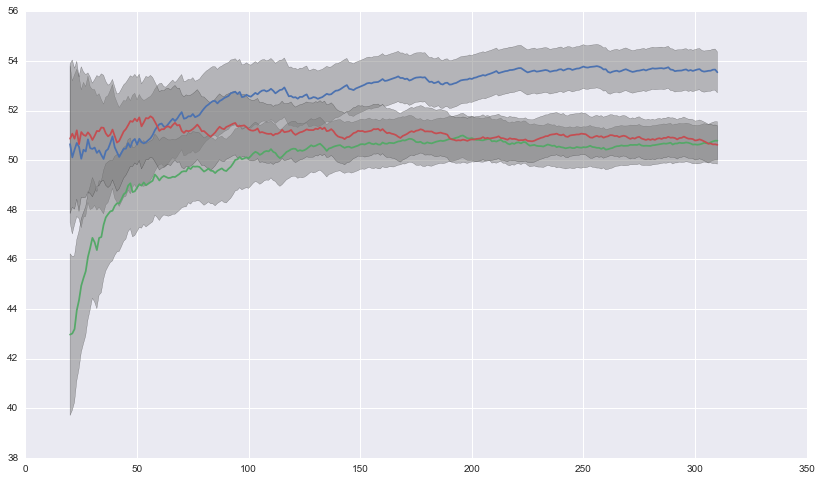

In [53]:
plot_compare(players_low_tau,["mzotkiew","shummie","erdman"])

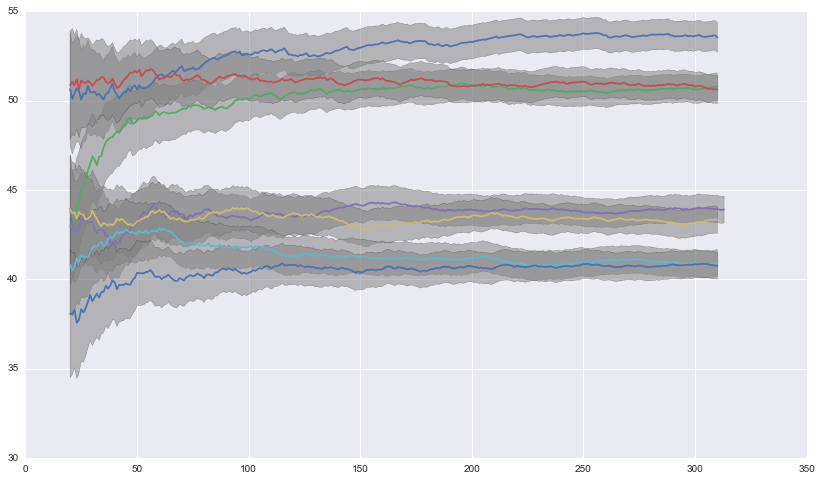

In [58]:
plot_compare(players_low_tau,["mzotkiew","shummie","erdman",  "tmseiler", "djma", "DanielVF", "Sydriax"])